# Kmeans Clustering

In [1]:
import pandas as pd
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data=make_blobs(n_samples=200,n_features=2,centers=4,cluster_std=1.6,random_state=50)
points=data[0]
print(data[0:2])


(array([[-1.06705283e+00,  9.24306355e+00],
       [ 1.08654318e+00, -6.94815805e+00],
       [-2.30970265e+00,  5.84969440e+00],
       [-1.59728965e+00,  8.45369045e+00],
       [-5.79816711e+00, -3.78405528e+00],
       [-2.29833776e+00, -4.66005371e+00],
       [-1.68210799e+00,  1.12843423e+01],
       [-7.38296450e-01, -5.20135260e+00],
       [-1.92048345e-01, -6.45318764e+00],
       [-6.37920287e+00, -2.17672355e+00],
       [-5.12054803e+00, -2.91449176e+00],
       [-4.22297649e+00,  9.04719945e+00],
       [-2.67815731e+00, -2.32828819e+00],
       [-3.02994109e+00,  1.86959382e+00],
       [-5.73938121e+00, -7.25648845e-01],
       [-1.99427571e+00,  4.28616868e+00],
       [-2.89522086e+00,  1.10222354e+01],
       [-1.11286937e+00,  1.03086380e+01],
       [-5.19987051e+00, -1.59879364e+00],
       [-4.75916597e+00, -1.97047767e+00],
       [-6.76865308e+00, -3.56907573e+00],
       [-2.65715781e+00,  3.33763714e+00],
       [-4.61722463e+00,  1.06373187e+01],
       [-1

(-15, 15)

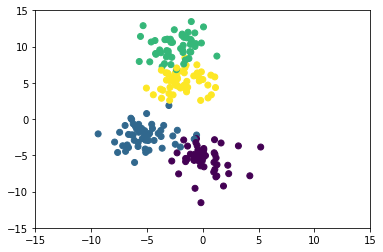

In [9]:
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)

In [10]:
#implement Kmeans

from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4)


In [11]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
kmeans.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
print(kmeans.cluster_centers_)

[[ 0.05161133 -5.35489826]
 [-1.92101646  5.21673484]
 [-2.40167949 10.17352695]
 [-5.56465793 -2.34988939]]


In [14]:
y_km=kmeans.fit_predict(points)

In [15]:
y_km[0,0]

array([1, 2, 3, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 3, 0, 3, 1, 1, 0, 0, 0, 3,
       1, 1, 1, 3, 1, 2, 3, 1, 1, 0, 0, 2, 2, 0, 0, 0, 3, 3, 1, 0, 3, 3,
       2, 2, 1, 3, 3, 1, 2, 0, 3, 1, 3, 3, 2, 0, 0, 3, 2, 2, 1, 2, 2, 1,
       2, 3, 1, 1, 2, 0, 1, 2, 3, 3, 0, 3, 3, 2, 0, 3, 0, 0, 0, 0, 1, 2,
       1, 0, 2, 1, 2, 3, 3, 0, 2, 3, 2, 3, 0, 2, 3, 1, 3, 2, 3, 2, 0, 1,
       2, 0, 1, 1, 0, 3, 1, 1, 3, 2, 1, 3, 1, 1, 2, 1, 1, 3, 3, 2, 0, 2,
       2, 3, 1, 3, 2, 1, 1, 0, 1, 3, 3, 2, 0, 1, 2, 3, 2, 0, 1, 0, 3, 2,
       2, 3, 1, 2, 2, 2, 3, 3, 2, 2, 0, 0, 0, 3, 2, 2, 2, 2, 0, 3, 2, 3,
       0, 2, 1, 3, 2, 3, 3, 1, 0, 2, 0, 1, 3, 2, 3, 3, 0, 3, 2, 1, 0, 3,
       0, 1])

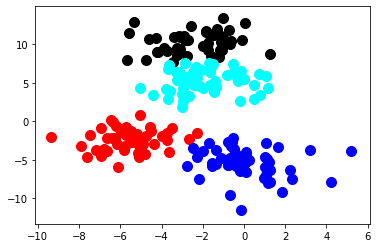

In [18]:
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan')

# And voila! We have our 4 clusters. Note that the k-means++ algorithm did a better job than the plain ole’ k-means I ran in the example, as it nearly perfectly captured the boundaries of the initial clusters we created.

In [19]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

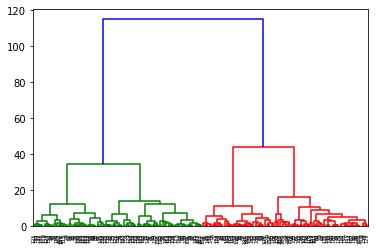

In [20]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(points)

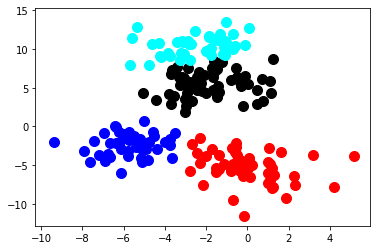

In [21]:
plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
plt.scatter(points[y_hc==1,0], points[y_hc == 1,1], s=100, c='black')
plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], s=100, c='blue')
plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1], s=100, c='cyan')